In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings     # ignore warnings
warnings.filterwarnings("ignore")


#### Load Dataset

In [26]:
df = pd.read_csv('car data.csv')

In [27]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [28]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       

In [29]:
df.shape

(301, 9)

In [30]:
df.size

2709

#### Data cleaning

In [31]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [32]:
df.duplicated().sum()

2

In [33]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [34]:
df.dtypes


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [35]:
df.columns.str.strip()

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [36]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [38]:
df['Car_Age'] = 2024 - df['Year']
df = df.drop(['Year', 'Car_Name'], axis=1)


#### Datatype conversion and Encoding

In [39]:
# Convert categorical columns to numeric using one-hot encoding
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the data types after conversion
print("Data types after conversion:\n", df_encoded.dtypes)



Data types after conversion:
 Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
Car_Age                      int64
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Selling_type_Individual       bool
Transmission_Manual           bool
dtype: object


In [40]:
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# Display the data types after conversion
print("Data types after conversion:\n", df_encoded.dtypes)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

Data types after conversion:
 Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
Car_Age                      int64
Fuel_Type_Diesel             int32
Fuel_Type_Petrol             int32
Selling_type_Individual      int32
Transmission_Manual          int32
dtype: object


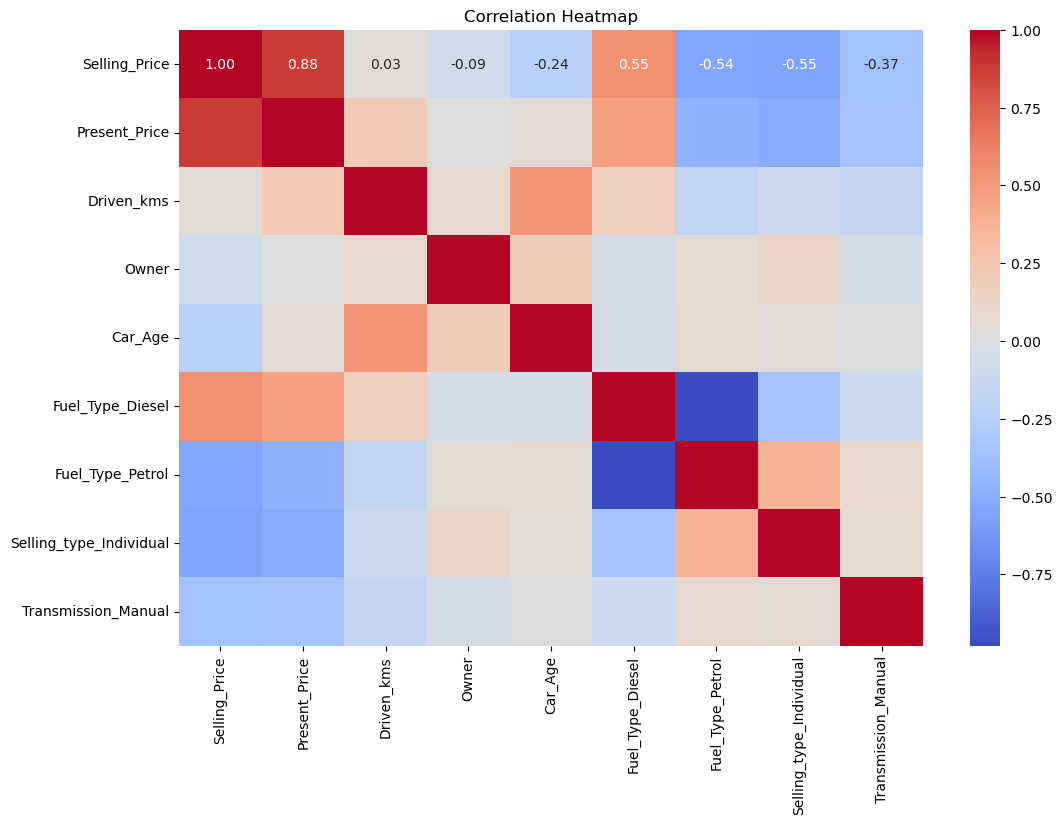

In [41]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

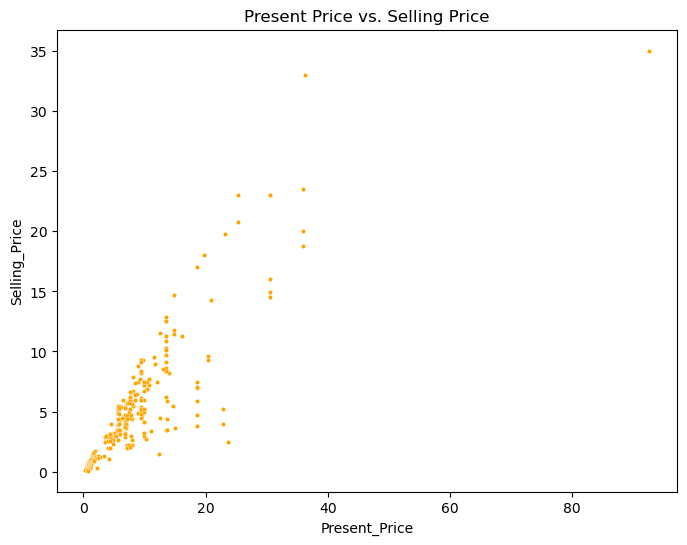

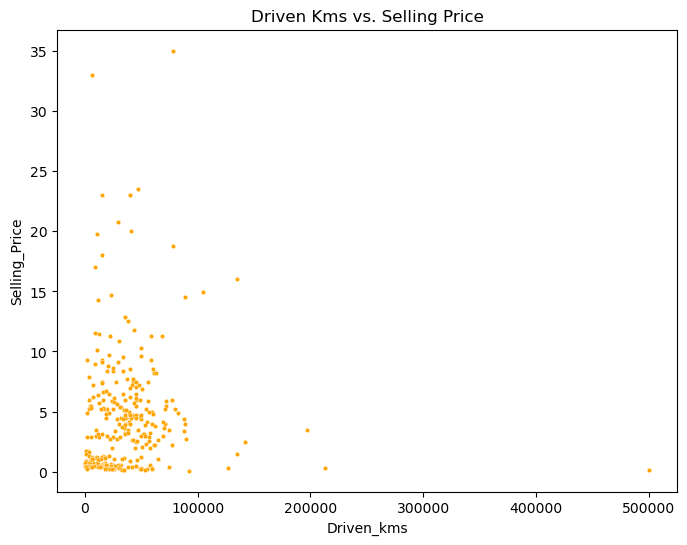

In [42]:
# Scatter Plot for Present Price vs. Selling Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df_encoded, s=10, color='orange')
plt.title('Present Price vs. Selling Price')
plt.show()

# Scatter Plot for Driven Kms vs. Selling Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df_encoded, s=10, color='orange')
plt.title('Driven Kms vs. Selling Price')
plt.show()

In [43]:
# Define feature matrix X and target vector y
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

In [44]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 240
Testing set size: 61


In [46]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [47]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.2163740193330363
Mean Squared Error (MSE): 3.4813498305118253
Root Mean Squared Error (RMSE): 1.8658375680942394
R-squared (R2): 0.848870783919315


In [50]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(15))

     Actual  Predicted
177    0.35   2.954337
289   10.11   8.177163
228    4.95   6.456123
198    0.15  -1.423372
60     6.95   9.088647
9      7.45   7.417936
118    1.10   1.335139
154    0.50   0.840323
164    0.45   1.363202
33     6.00   7.490678
5      9.25   9.116237
116    1.10   0.586021
45     7.50   8.417190
173    0.40   3.421829
230    6.15   6.901764
